<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Поиск-по-изображению" data-toc-modified-id="Поиск-по-изображению-1">Поиск по изображению</a></span></li><li><span><a href="#1.-Исследовательский-анализ-данных" data-toc-modified-id="1.-Исследовательский-анализ-данных-2">1. Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-2.1">EDA</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2">Предобработка данных</a></span></li></ul></li><li><span><a href="#2.-Проверка-данных" data-toc-modified-id="2.-Проверка-данных-3">2. Проверка данных</a></span></li><li><span><a href="#3.-Векторизация-изображений" data-toc-modified-id="3.-Векторизация-изображений-4">3. Векторизация изображений</a></span></li><li><span><a href="#4.-Векторизация-текстов" data-toc-modified-id="4.-Векторизация-текстов-5">4. Векторизация текстов</a></span></li><li><span><a href="#5.-Объединение-векторов" data-toc-modified-id="5.-Объединение-векторов-6">5. Объединение векторов</a></span></li><li><span><a href="#6.-Обучение-модели-предсказания-соответствия" data-toc-modified-id="6.-Обучение-модели-предсказания-соответствия-7">6. Обучение модели предсказания соответствия</a></span></li><li><span><a href="#7.-Тестирование-модели" data-toc-modified-id="7.-Тестирование-модели-8">7. Тестирование модели</a></span></li><li><span><a href="#8.-Вывод" data-toc-modified-id="8.-Вывод-9">8. Вывод<br></a></span></li></ul></div>

## Поиск по изображению

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

Описание данных


В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


In [ ]:
!rm -rf /content/*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

import re
import nltk
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.metrics import RootMeanSquaredError
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV, cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import torch
from transformers import AutoModel, BertTokenizer

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Настройка TensorFlow на использование первого доступного GPU
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print(f"Using GPU: {gpus[0].name}")
    except RuntimeError as e:
        # В случае возникновения ошибки (например, GPU уже используется) - выводим сообщение
        print(e)
else:
    print("GPU not available, using CPU instead.")

Using GPU: /physical_device:GPU:0


In [1]:
!nvidia-smi

Sat Mar 16 20:12:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4060 ...    On  | 00000000:01:00.0 Off |                  N/A |
| N/A   46C    P8               2W /  60W |   1000MiB /  8188MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [ ]:
!wget https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
!unzip -q dsplus_integrated_project_4.zip
!ls

--2024-03-15 13:55:11--  https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
Resolving code.s3.yandex.net (code.s3.yandex.net)... 93.158.134.158, 2a02:6b8::2:158
Connecting to code.s3.yandex.net (code.s3.yandex.net)|93.158.134.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150987455 (144M) [application/zip]
Saving to: ‘dsplus_integrated_project_4.zip’

dsplus_integrated_p 100%[===================>] 143.99M  10.9MB/s    in 16s     

2024-03-15 13:55:29 (9.08 MB/s) - ‘dsplus_integrated_project_4.zip’ saved [150987455/150987455]

dsplus_integrated_project_4.zip  __MACOSX  to_upload


In [ ]:
DATA_PATH = "/content/to_upload/"

df_train = pd.read_csv(os.path.join(DATA_PATH, 'train_dataset.csv'))
df_test = pd.read_csv(os.path.join(DATA_PATH, 'test_queries.csv'), index_col=[0], sep='|')
df_test_images = pd.read_csv(os.path.join(DATA_PATH, 'test_images.csv'))
df_crowd = pd.read_csv(os.path.join(DATA_PATH, 'CrowdAnnotations.tsv'), sep='\t',
                        names=['image', 'query_id', 'positive_rate', 'positive_count', 'negative_count'])
df_expert = pd.read_csv(os.path.join(DATA_PATH, 'ExpertAnnotations.tsv'), sep='\t',
                        names=['image', 'query_id', 'expert_1', 'expert_2', 'expert_3'])

### EDA

Посмотрим на данные

In [ ]:
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...  
1  A young child is wearing blue goggles and sitt...  
2  A young child is wearing blue goggles and sitt...  
3  A young child is wearing blue goggles and sitt...  
4  A young child is wearing blue goggles and sitt...

In [ ]:
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


query_id  \
0  1177994172_10d143cb8d.jpg#0   
1  1177994172_10d143cb8d.jpg#1   
2  1177994172_10d143cb8d.jpg#2   
3  1177994172_10d143cb8d.jpg#3   
4  1177994172_10d143cb8d.jpg#4   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   
1  Two boys are squirting water guns at each other .   
2            Two boys spraying each other with water   
3  Two children wearing jeans squirt water at eac...   
4  Two young boys are squirting water at each oth...   

                       image  
0  1177994172_10d143cb8d.jpg  
1  1177994172_10d143cb8d.jpg  
2  1177994172_10d143cb8d.jpg  
3  1177994172_10d143cb8d.jpg  
4  1177994172_10d143cb8d.jpg

In [ ]:
df_test_images.info()
df_test_images.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


image
0  3356748019_2251399314.jpg
1  2887171449_f54a2b9f39.jpg
2  3089107423_81a24eaf18.jpg
3  1429546659_44cb09cbe2.jpg
4  1177994172_10d143cb8d.jpg

In [ ]:
df_crowd.info()
df_crowd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   image           47830 non-null  object 
 1   query_id        47830 non-null  object 
 2   positive_rate   47830 non-null  float64
 3   positive_count  47830 non-null  int64  
 4   negative_count  47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


image                     query_id  positive_rate  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2            1.0   
1  1056338697_4f7d7ce270.jpg   114051287_dd85625a04.jpg#2            0.0   
2  1056338697_4f7d7ce270.jpg  1427391496_ea512cbe7f.jpg#2            0.0   
3  1056338697_4f7d7ce270.jpg  2073964624_52da3a0fc4.jpg#2            0.0   
4  1056338697_4f7d7ce270.jpg  2083434441_a93bc6306b.jpg#2            0.0   

   positive_count  negative_count  
0               3               0  
1               0               3  
2               0               3  
3               0               3  
4               0               3

In [ ]:
df_expert.info()
df_expert.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   expert_1  5822 non-null   int64 
 3   expert_2  5822 non-null   int64 
 4   expert_3  5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  
0         1  
1         2  
2         2  
3         2  
4         2

Проверим наличие дубликатов

In [ ]:
display(
    df_train.duplicated().sum(),
    df_test.duplicated().sum(),
    df_test_images.duplicated().sum(),
    df_crowd.duplicated().sum(),
    df_expert.duplicated().sum()
)

0

0

0

0

0

Посмотрим на изображения

Train

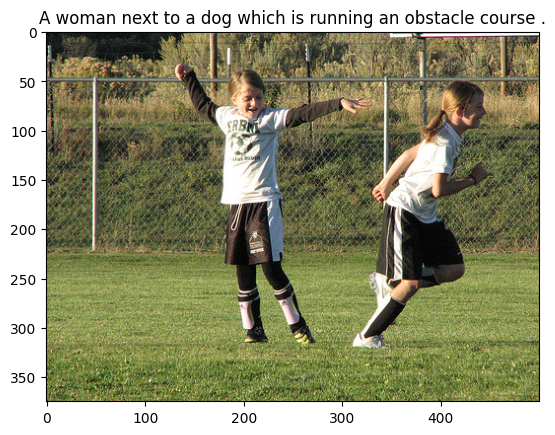

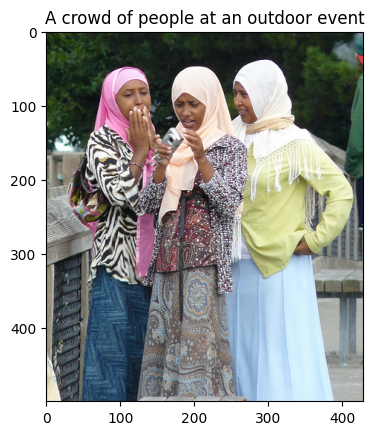

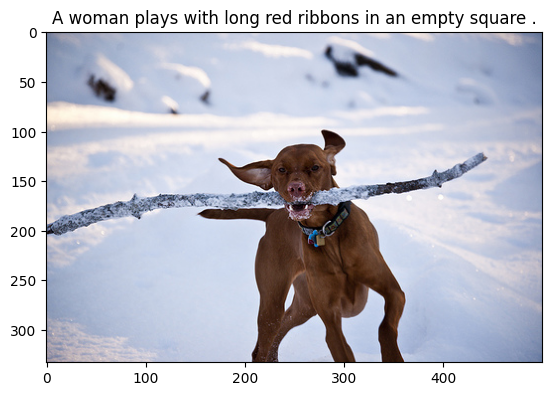

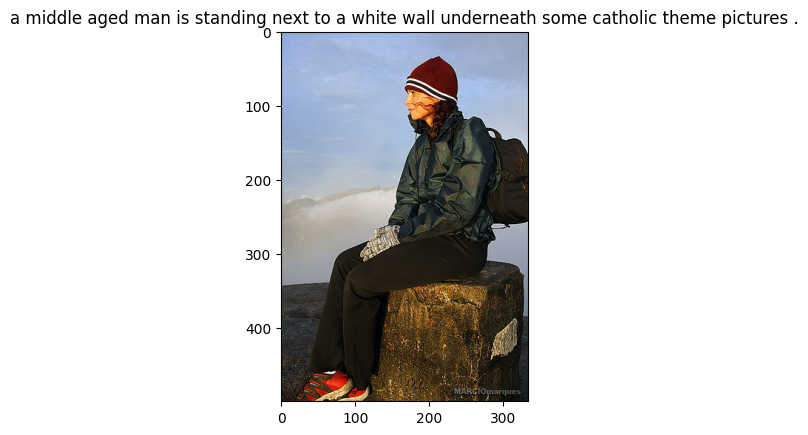

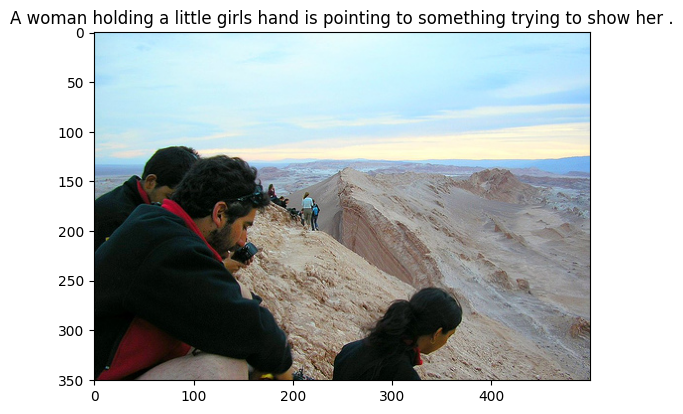

In [ ]:
images = random.sample(df_train['image'].unique().tolist(), 5)
for image in images:
  description = df_train[df_train['image'] == image]['query_text'].values[0]
  img = mpimg.imread(f'/content/to_upload/train_images/{image}')
  plt.imshow(img)
  plt.title(description)
  plt.show()

Для train выводятся не очень релевантные описания

Test

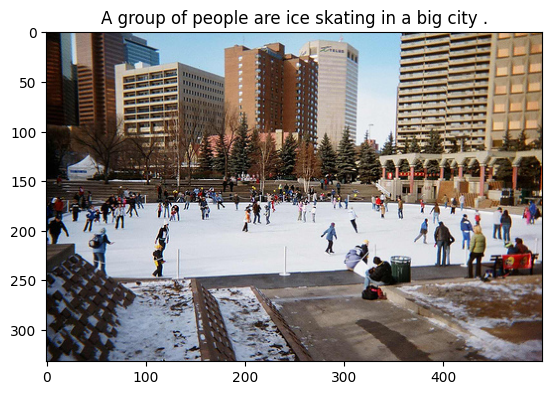

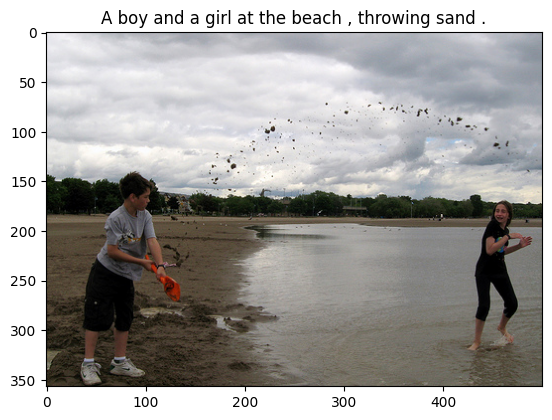

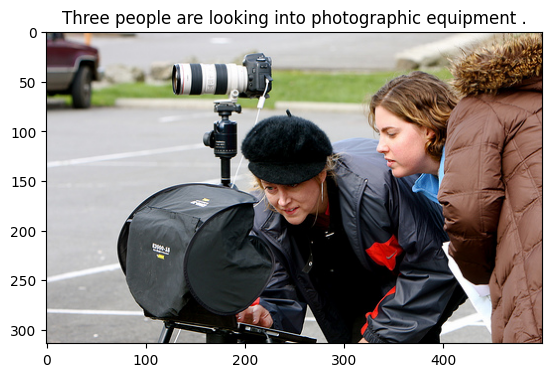

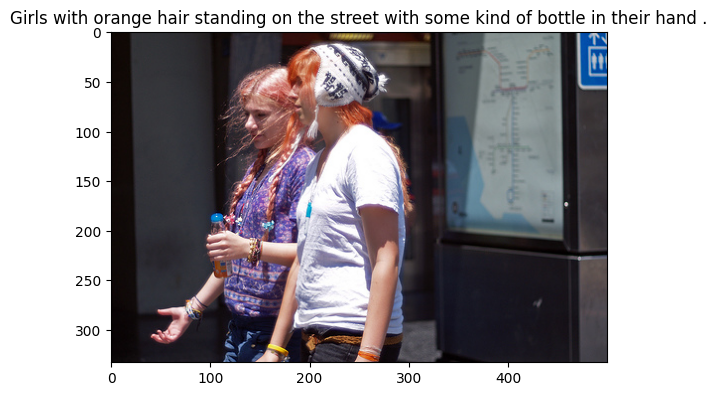

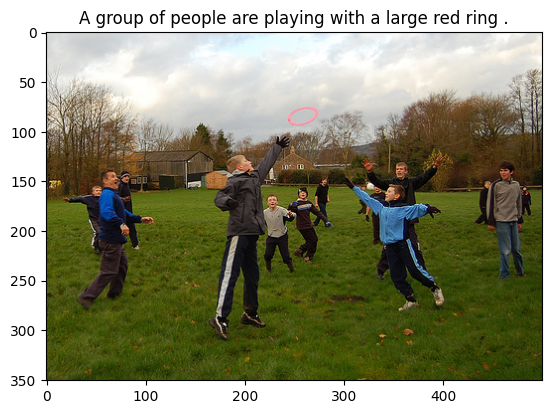

In [ ]:
images = random.sample(df_test['image'].unique().tolist(), 5)
for image in images:
  description = df_test[df_test['image'] == image]['query_text'].values[0]
  img = mpimg.imread(f'/content/to_upload/test_images/{image}')
  plt.imshow(img)
  plt.title(description)
  plt.show()

На тестовых дданных описание и картинка соответвуют друг другу

Количество уникальных изображений

In [ ]:
df_train['image'].nunique()

1000

In [ ]:
df_test['image'].nunique()

100

Количество уникальных запросов

In [ ]:
df_train['query_id'].nunique()

977

In [ ]:
df_test['query_id'].nunique()

500

Оценки

In [ ]:
df_expert[['expert_1', 'expert_2', 'expert_3']].describe()

expert_1     expert_2     expert_3
count  5822.000000  5822.000000  5822.000000
mean      1.436620     1.624356     1.881999
std       0.787084     0.856222     0.904087
min       1.000000     1.000000     1.000000
25%       1.000000     1.000000     1.000000
50%       1.000000     1.000000     2.000000
75%       2.000000     2.000000     2.000000
max       4.000000     4.000000     4.000000

In [ ]:
df_crowd[['positive_rate', 'positive_count', 'negative_count']].describe()

positive_rate  positive_count  negative_count
count   47830.000000    47830.000000    47830.000000
mean        0.068786        0.208488        2.820155
std         0.207532        0.628898        0.656676
min         0.000000        0.000000        0.000000
25%         0.000000        0.000000        3.000000
50%         0.000000        0.000000        3.000000
75%         0.000000        0.000000        3.000000
max         1.000000        5.000000        6.000000

**Вывод**<br>
 - в обучающей выборке 1000 уникальных изображение и 977 уникальных описаний, всего пар 5822
 - в тестовой выборке 100 уникальных изображений и 500 уникальных запросов, всего 500 пар
 - предоставлено предоставлено 47830 краудфандинговых оценок и 5822 экспертных, в обоих случая большоство оценок негативных

### Предобработка данных

Добавим аггрегацию оценок

**Эксперты**

In [ ]:
def aggregate_expert_scores(row):
    scores = [row['expert_1'], row['expert_2'], row['expert_3']]
    score_counts = pd.Series(scores).value_counts()
    if score_counts.max() == 1:
        return np.nan
    else:
        return score_counts.idxmax()
df_expert['expert_final_score'] = df_expert.apply(aggregate_expert_scores, axis=1)
df_expert['expert_score_norm'] = (df_expert['expert_final_score'] - 1) / 3

df_expert.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2         1         1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2         1         1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2         1         1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2         1         2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2         1         1   

   expert_3  expert_final_score  expert_score_norm  
0         1                 1.0           0.000000  
1         2                 1.0           0.000000  
2         2                 1.0           0.000000  
3         2                 2.0           0.333333  
4         2                 1.0           0.000000

удаляем строки, где не было согласия экспертов

In [ ]:
df_expert.dropna(subset=['expert_final_score'], inplace=True)

In [ ]:
df_expert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               5696 non-null   object 
 1   query_id            5696 non-null   object 
 2   expert_1            5696 non-null   int64  
 3   expert_2            5696 non-null   int64  
 4   expert_3            5696 non-null   int64  
 5   expert_final_score  5696 non-null   float64
 6   expert_score_norm   5696 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 356.0+ KB


**Объединение оценок**

In [ ]:
df_combined_score = pd.merge(df_expert, df_crowd, how='outer', on=['image', 'query_id'])
df_combined_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51268 entries, 0 to 51267
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image               51268 non-null  object 
 1   query_id            51268 non-null  object 
 2   expert_1            5696 non-null   float64
 3   expert_2            5696 non-null   float64
 4   expert_3            5696 non-null   float64
 5   expert_final_score  5696 non-null   float64
 6   expert_score_norm   5696 non-null   float64
 7   positive_rate       47830 non-null  float64
 8   positive_count      47830 non-null  float64
 9   negative_count      47830 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.3+ MB


In [ ]:
def combine_scores(row):
    if np.isnan(row['expert_score_norm']):
        row['final_score'] = row['positive_rate']
    elif np.isnan(row['positive_rate']):
        row['final_score'] = row['expert_score_norm']
    else:
        row['final_score'] = 0.6 * row['expert_score_norm'] + 0.4 * row['positive_rate']
    return row

df_combined_score = df_combined_score.apply(combine_scores, axis=1)

In [ ]:
df_combined_score['final_score'].describe()

count    51268.000000
mean         0.074504
std          0.207093
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: final_score, dtype: float64

In [ ]:
df_combined_score[df_combined_score['final_score']>0.5].count()

image                 2910
query_id              2910
expert_1               624
expert_2               624
expert_3               624
expert_final_score     624
expert_score_norm      624
positive_rate         2851
positive_count        2851
negative_count        2851
final_score           2910
dtype: int64

In [ ]:
df_combined_score.head()

image                     query_id  expert_1  expert_2  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2       1.0       1.0   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2       1.0       1.0   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2       1.0       1.0   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2       1.0       2.0   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2       1.0       1.0   

   expert_3  expert_final_score  expert_score_norm  positive_rate  \
0       1.0                 1.0           0.000000            0.0   
1       2.0                 1.0           0.000000            0.0   
2       2.0                 1.0           0.000000            NaN   
3       2.0                 2.0           0.333333            NaN   
4       2.0                 1.0           0.000000            NaN   

   positive_count  negative_count  final_score  
0             0.0             3.0     0.000000  
1             0.0             3.0     0.000000  
2             NaN             NaN     0.000000  
3             NaN             NaN     0.333333  
4             NaN             NaN     0.000000

**Вывод**
 - в нащем распоряжение 1000 картинок с описанием для обучения и 100 картинок с описанием для теста
 - также отдельно доступны наборы оценок полученные от экспертов и от краудфандигновой платформы, оценки соответствия описания картинки и текста были объеденены в одну
 - положительных оценок очень мало, меньше 0.05%

In [ ]:
df_train_final = pd.merge(df_train, df_combined_score[['image', 'query_id', 'final_score']], how='outer', on=['image', 'query_id'])

\

In [ ]:
fill_df = df_train[df_train['query_text'].notna()]
fill_dict = fill_df.groupby('query_id')['query_text'].first().to_dict()
df_train_final['query_text'] = df_train_final.apply(
    lambda row: fill_dict.get(row['query_id'], row['query_text'])
    if pd.isnull(row['query_text']) else row['query_text'], axis=1
    )

df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        51323 non-null  object 
 1   query_id     51323 non-null  object 
 2   query_text   50214 non-null  object 
 3   final_score  51268 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df_train_final = df_train_final.dropna(subset=['final_score', 'query_text']).reset_index(drop=True)

In [ ]:
df_train_final.info()
df_train_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50159 entries, 0 to 50158
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   image        50159 non-null  object 
 1   query_id     50159 non-null  object 
 2   query_text   50159 non-null  object 
 3   final_score  50159 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  final_score  
0  A young child is wearing blue goggles and sitt...          0.0  
1  A young child is wearing blue goggles and sitt...          0.0  
2  A young child is wearing blue goggles and sitt...          0.2  
3  A young child is wearing blue goggles and sitt...          1.0  
4  A young child is wearing blue goggles and sitt...          0.0

In [ ]:
df_train_initial = df_train
df_train = df_train_final


**Вывод**
 - оценки соответствия описания картинки и текста от краудфандинга и экспертов были объеденены в одну
 - подготовлен набор данных для обучения из 50159 записей

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
BLOCK_WORDS = ['child', 'children', 'teenager', 'teen', 'kid', 'todler', 'baby', 'girl', 'boy']

In [ ]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    tokens_pos = pos_tag(tokens)
    lemmas = [wnl.lemmatize(word, get_wordnet_pos(pos)) for word, pos in tokens_pos if word not in stop_words]
    text = " ".join(lemmas)
    return text

In [ ]:
df_train['text_lemma'] = df_train['query_text'].apply(preprocess_text)

In [ ]:
df_test['text_lemma'] = df_test['query_text'].apply(preprocess_text)

In [ ]:
df_train['query_text'][0]

'A young child is wearing blue goggles and sitting in a float in a pool .'

In [ ]:
df_train['text_lemma'][0]

'young child wear blue goggles sit float pool'

In [ ]:
df_test['query_text'][0]

'Two blonde boys , one in a camouflage shirt and the other in blue , are having a water fight .'

In [ ]:
df_test['text_lemma'][0]

'two blonde boys one camouflage shirt blue water fight'

In [ ]:
def blocked_words(text):
    return any(blocked_word in text.split() for blocked_word in BLOCK_WORDS)

df_train['blocked_word'] = df_train['text_lemma'].apply(blocked_words)


In [ ]:
df_train.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1262583859_653f1469a9.jpg  2549968784_39bfbe44f9.jpg#2   
2  2447284966_d6bbdb4b6e.jpg  2549968784_39bfbe44f9.jpg#2   
3  2549968784_39bfbe44f9.jpg  2549968784_39bfbe44f9.jpg#2   
4  2621415349_ef1a7e73be.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  final_score  \
0  A young child is wearing blue goggles and sitt...          0.0   
1  A young child is wearing blue goggles and sitt...          0.0   
2  A young child is wearing blue goggles and sitt...          0.2   
3  A young child is wearing blue goggles and sitt...          1.0   
4  A young child is wearing blue goggles and sitt...          0.0   

                                     text_lemma  blocked_word  
0  young child wear blue goggles sit float pool          True  
1  young child wear blue goggles sit float pool          True  
2  young child wear blue goggles sit float pool          True  
3  young child wear blue goggles sit float pool          True  
4  young child wear blue goggles sit float pool          True

**Вывод**
- Проведена лематизация текстовых описаний, удалены картинки, которые содержат слова, описывающие детей

In [ ]:
block_image = df_train[df_train["blocked_word"]]["query_id"].apply(lambda x: x[:-2]).unique().tolist()
df_train = df_train[~df_train["image"].isin(block_image)]
df_train.reset_index(inplace=True, drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36103 entries, 0 to 36102
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         36103 non-null  object 
 1   query_id      36103 non-null  object 
 2   query_text    36103 non-null  object 
 3   final_score   36103 non-null  float64
 4   text_lemma    36103 non-null  object 
 5   blocked_word  36103 non-null  bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 1.4+ MB


## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False)
model_img_vect = Sequential()
model_img_vect.add(base_model)
model_img_vect.add(GlobalAveragePooling2D())
optimizer = Adam(learning_rate=1e-3)
model_img_vect.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mean_absolute_error'])

In [ ]:
generator_train = datagen.flow_from_dataframe(
    dataframe=df_train,
    directory='/content/to_upload/train_images',
    x_col='image',
    y_col='final_score',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',
    shuffle=False,
    seed=SEED
)

Found 36103 validated image filenames.


In [ ]:
img_vect_train = model_img_vect.predict(generator_train, steps=np.ceil(len(df_train)/generator_train.batch_size))
img_vect_train.shape

1129/1129 [==============================] - 215s 187ms/step


(36103, 2048)

**Вывод**<br>
Проведена векторизация изображений с использованием модели ResNet50

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


**Вывод**<br>
Проведена векторизация текстов с использованием TF IDF

In [ ]:
model_bert = AutoModel.from_pretrained("bert-base-uncased")
tokenizer_bert = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
batch_size = 32
max_length = 512

In [ ]:
texts = df_train['text_lemma'].tolist()

In [ ]:
if torch.cuda.is_available():
    model_bert.to('cuda')

In [ ]:
def get_embeddings(texts):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        encoded_batch = tokenizer_bert.batch_encode_plus(batch_texts,
                                                          add_special_tokens=True,
                                                          max_length=max_length,
                                                          truncation=True,
                                                          padding=True,
                                                          return_tensors='pt')
        input_ids = encoded_batch['input_ids']
        attention_mask = encoded_batch['attention_mask']

        if torch.cuda.is_available():
            input_ids = input_ids.to('cuda')
            attention_mask = attention_mask.to('cuda')

        with torch.no_grad():
            model_output = model_bert(input_ids, attention_mask=attention_mask)

        embeddings.extend(model_output.last_hidden_state.mean(dim=1).cpu().numpy())

    return np.array(embeddings)

In [ ]:
text_vect_train = get_embeddings(texts)

In [ ]:
text_vect_train.shape

(36103, 768)

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [ ]:
y = df_train['final_score'].values

In [ ]:
assert img_vect_train.shape[0] == text_vect_train.shape[0] == y.shape[0]

In [ ]:
X = np.concatenate((img_vect_train, text_vect_train), axis=1)
X.shape

(36103, 2816)

**Вывод**<br>
Объеденены векторы изображений и текстов

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [ ]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=SEED)
train_indices, test_indices = next(gss.split(X=X, y=y, groups=df_train['image']))

In [ ]:
X_train, X_val = X[train_indices], X[test_indices]
y_train, y_val = y[train_indices], y[test_indices]

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

В качесте метрики выберем RMSE, так для задачи оценки точности совпадения, важно понимать насколько большие ошибки.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"LinearRegression RMSE: {rmse:.3f}")

LinearRegression RMSE: 9311.707


In [ ]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Ridge Regression RMSE: {rmse:.3f}")

Ridge Regression RMSE: 0.211


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.8147e-08): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Lasso Regression RMSE: {rmse:.3f}")

Lasso Regression RMSE: 0.214


In [ ]:
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)
y_pred_elastic = elastic_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Elastic Net RMSE: {rmse:.3f}")

Elastic Net RMSE: 0.214


На валидационных данных модели с регуляризацией показали примерно одинаковые результаты, несравненно лучшие чем для линейной регрессии. Попробуем подобрать гиперпараметры для улучшения Lasso regression



In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100]
max_iters = [1000, 5000, 10000]
tols = [1e-4, 1e-3, 1e-2]

best_rmse = np.inf
best_params = {}

for alpha in alphas:
    for max_iter in max_iters:
        for tol in tols:
            model = Lasso(alpha=alpha, max_iter=max_iter, tol=tol, random_state=SEED)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            rmse = mean_squared_error(y_val, y_pred, squared=False)

            if rmse < best_rmse:
                best_rmse = rmse
                best_params = {'alpha': alpha, 'max_iter': max_iter, 'tol': tol}

print("Лучшие параметры:", best_params)
print(f"Lasso RMSE: {best_rmse:.3f}")

Лучшие параметры: {'alpha': 0.001, 'max_iter': 1000, 'tol': 0.0001}
Lasso RMSE: 0.208


Будем использовать оценку RMSE: 0.208 в качестве baseline. Попробуем ее улучшить с помощью нейросети

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.001,
    mode='min',
    verbose=1
)

model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.4))
model.add(Dense(256, activation='elu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='elu', kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=[RootMeanSquaredError()])
model.fit(X_train,
          y_train,
          validation_data=(X_val, y_val),
          epochs=1000,
          batch_size=16,
          callbacks=[early_stopping],
          verbose=2)

Epoch 1/1000
1567/1567 - 12s - loss: 1.8031 - root_mean_squared_error: 0.4880 - val_loss: 1.5248 - val_root_mean_squared_error: 0.2147 - 12s/epoch - 8ms/step
Epoch 2/1000
1567/1567 - 9s - loss: 1.3928 - root_mean_squared_error: 0.2350 - val_loss: 1.2118 - val_root_mean_squared_error: 0.2087 - 9s/epoch - 6ms/step
Epoch 3/1000
1567/1567 - 8s - loss: 1.0037 - root_mean_squared_error: 0.2190 - val_loss: 0.7754 - val_root_mean_squared_error: 0.2066 - 8s/epoch - 5ms/step
Epoch 4/1000
1567/1567 - 9s - loss: 0.5757 - root_mean_squared_error: 0.2179 - val_loss: 0.3933 - val_root_mean_squared_error: 0.2068 - 9s/epoch - 5ms/step
Epoch 5/1000
1567/1567 - 9s - loss: 0.2865 - root_mean_squared_error: 0.2184 - val_loss: 0.1994 - val_root_mean_squared_error: 0.2066 - 9s/epoch - 5ms/step
Epoch 6/1000
1567/1567 - 8s - loss: 0.1660 - root_mean_squared_error: 0.2183 - val_loss: 0.1334 - val_root_mean_squared_error: 0.2062 - 8s/epoch - 5ms/step
Epoch 7/1000
1567/1567 - 9s - loss: 0.1217 - root_mean_squared

Удалось подобрать такие параметры нейросети, что получилось немного улучшить метрику RMSE - до 0.204

**Выводы**
 - было убечно несколько моделей
 - модель Linear Regression показала нерелевантый результат
 - Модели с регуляризацией Lasso, Ridge, ElasticNet, покзали примерно одинаковый результат
 - Для Lasso был осуществлен подбор параметров, что позволило получить метрику RMSE 0.208
 - с помощью нейросети из 3 полносвязных слоев удалось улучшить метрику до 0.204

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [ ]:
generator_test = datagen.flow_from_dataframe(
    dataframe=df_test_images,
    directory='/content/to_upload/test_images',
    x_col='image',
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False,
    seed=SEED
)

Found 100 validated image filenames.


In [ ]:
img_vect_test = model_img_vect.predict(generator_test, steps=np.ceil(len(df_test_images)/generator_test.batch_size))
img_vect_test.shape

4/4 [==============================] - 4s 534ms/step


(100, 2048)

In [ ]:
def relevant_image(query_text):
    processed_text = preprocess_text(query_text)

    if blocked_words(processed_text):
        return "BLOCK", "BLOCK", "BLOCK"


    text_vect = get_embeddings([processed_text])
    text_vect_repeated = np.repeat(text_vect, img_vect_test.shape[0], axis=0)
    data_for_predict = scaler.transform(np.concatenate([img_vect_test, text_vect_repeated], axis=1))
    similarities = model.predict(data_for_predict)
    max_similarity_idx = np.argmax(similarities)
    similarity_rate = max(similarities)

    max_similarity_image = df_test_images.iloc[max_similarity_idx]['image']
    img_path = f'/content/to_upload/test_images/{max_similarity_image}'

    return img_path, max_similarity_image, similarity_rate

In [ ]:
def show_images(number_of_sapmles):
  sample_queries = df_test.sample(n=number_of_sapmles)
  text_test = list(sample_queries['query_text'])
  count=0
  for text in text_test:
    count+=1
    print("#", count)
    img_path, max_similarity_image, similarity_rate = relevant_image(text)
    if img_path == "BLOCK":
      print("Query text:", text)
      print('Response:')
      print("This image is unavailable in your country in compliance with local laws.")
    else:
      print("Query text:", text)
      print("Most similar image: ", max_similarity_image)
      print("Similarity rate:", similarity_rate)
      img = mpimg.imread(img_path)
      plt.imshow(img)
      plt.title(f"Image: {max_similarity_image}")
      plt.show()
    print("="*100)

# 1
4/4 [==============================] - 0s 3ms/step
Query text: A brown and white dog walks in the snow with a big chunk of snow in his mouth .
Most similar image:  3044359043_627488ddf0.jpg
Similarity rate: [0.10872345]


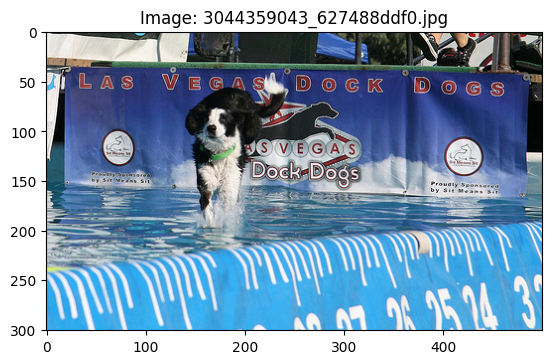

# 2
4/4 [==============================] - 0s 9ms/step
Query text: A man , seen from the back , with his head turned to the side wearing a backpack
Most similar image:  2308256827_3c0a7d514d.jpg
Similarity rate: [0.13911942]


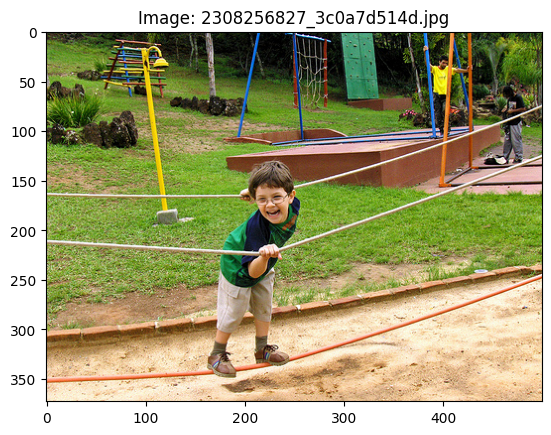

# 3
4/4 [==============================] - 0s 8ms/step
Query text: A man on an orange bike .
Most similar image:  3517023411_a8fbd15230.jpg
Similarity rate: [0.82134044]


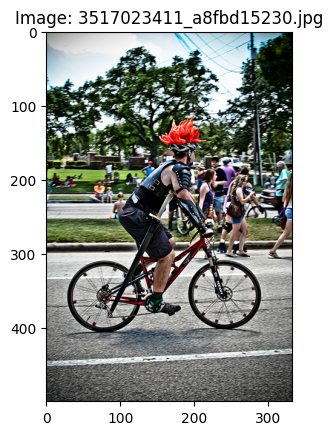

# 4
4/4 [==============================] - 0s 4ms/step
Query text: A snowboarder wearing a red jacket is going down a mountain .
Most similar image:  3163198309_bbfe504f0a.jpg
Similarity rate: [0.5119615]


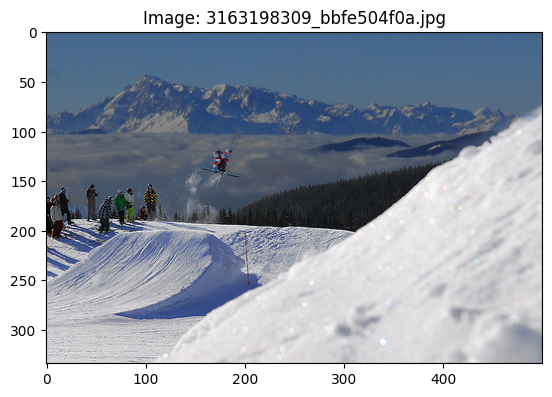

# 5
Query text: two girls walking in the street
Response:
This image is unavailable in your country in compliance with local laws.
# 6
Query text: The little girl tackles a man and makes the universal sign for " Touchdown ! "
Response:
This image is unavailable in your country in compliance with local laws.
# 7
4/4 [==============================] - 0s 8ms/step
Query text: A group of six men stand in a circle playing instruments in a wooded parking lot .
Most similar image:  862156271_3eacea90a8.jpg
Similarity rate: [0.09482581]


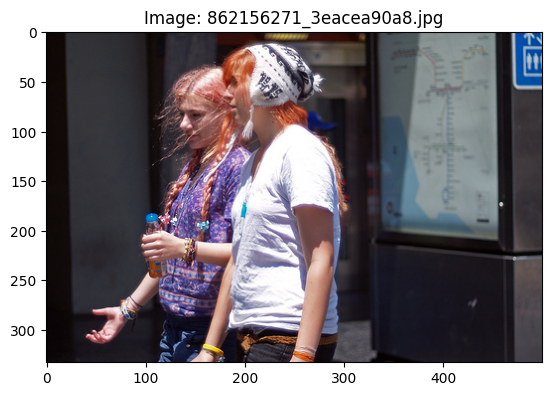

# 8
Query text: Girls wearing sports uniforms and eye protection .
Response:
This image is unavailable in your country in compliance with local laws.
# 9
Query text: Boy flings mud at girl
Response:
This image is unavailable in your country in compliance with local laws.
# 10
4/4 [==============================] - 0s 4ms/step
Query text: a lone man sitting on a ledge that overlooks the beach
Most similar image:  2552438538_285a05b86c.jpg
Similarity rate: [0.2654226]


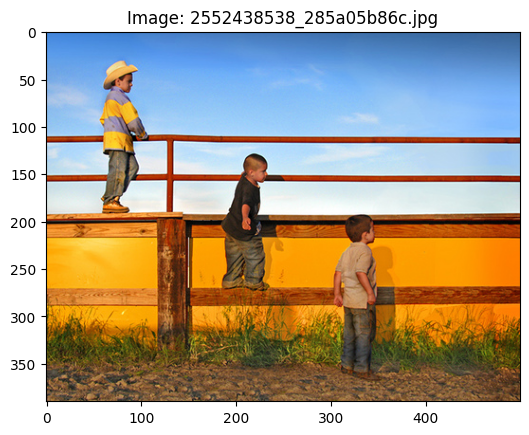

In [ ]:
number_of_sapmles = 10
show_images(number_of_sapmles)

In [ ]:
get_embeddings('woman wear jewelry hold piece paper look').shape

(40, 768)

## 8. Вывод<br>
 - Проведено тестирование нейронной сети: на основе 10 тестовых запросов были найдены самые подходящие картники по описанию. При визуальном сравнении качество определения картинки не удовлетворительное.
 - Возможнные причины:
  - недостаточный объем обучающей выборки
  - обучающая выборка не сбалансирована, вней очень мало пар картинка-описание, которые совпадают друг с другом